In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

IMG_SIZE = (224, 224)

burn_class_names = ['first degree', 'second degree', 'third degree']

model = load_model(r"C:\Users\ahmed\OneDrive\Desktop\Files\tasks\Skin_Burn\Burn.h5", compile=False)

# دالة لتحضير الصورة
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Could not load image: {img_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, IMG_SIZE)
    img_preprocessed = preprocess_input(img_resized.astype('float32'))
    return np.expand_dims(img_preprocessed, axis=0), img_rgb


In [ ]:
def classify_image(img_path):
    try:
        img_input, img_display = preprocess_image(img_path)

        plt.imshow(img_display)
        plt.axis('off')
        plt.title("Test Image")
        plt.show()

        predictions = model.predict(img_input)
        class_index = np.argmax(predictions[0])
        class_label = burn_class_names[class_index]
        class_confidence = predictions[0][class_index] * 100

        print(f"\nPredicted Burn Degree: {class_label} ({class_confidence:.2f}%)")

    except Exception as e:
        print(f"Error: {str(e)}")

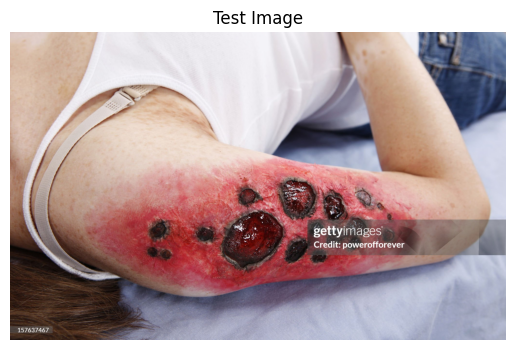

1/1 [==============================] - 0s 454ms/step

Predicted Burn Degree: third degree (100.00%)


In [7]:
img_path = r"C:\Users\ahmed\OneDrive\Desktop\Files\tasks\Burn\last_databurn\3nd degree\gettyimages-157637467-2048x2048.jpg"
classify_image(img_path)
